In [14]:
import torchvision
torchvision.disable_beta_transforms_warning()

import torch
from PIL import Image
from torchvision.transforms.v2 import functional as F
import numpy as np

import matplotlib.pyplot as plt

In [2]:
model = torch.hub.load('facebookresearch/dinov2', 'dinov2_vitl14')
model.eval().cuda()

Using cache found in /root/.cache/torch/hub/facebookresearch_dinov2_main


In [4]:
im = Image.open('/root/krishneel/Downloads/real_veggie_test_images/image_20.png')

In [5]:
features = None
def hook(n, i, o):
    global features
    features = o

In [70]:
in_hw = (14 * 60, 14 * 80)
im_resize = F.resize_image_pil(im, size=in_hw)
x = F.to_image_tensor(im_resize).cuda().float()[None, ] / 255.0
# hid = model.blocks[-1].register_forward_hook(hook)

with torch.no_grad():
    y = model.forward_features(x)

cls_token = y['x_norm_clstoken']
patch_token = y['x_norm_patchtokens'].permute(0, 2, 1)
patch_token = patch_token.reshape(*patch_token.shape[:2], in_hw[0] // 14, -1)

tensor([[2.1717, 2.1717, 2.1717,  ..., 2.1717, 2.1717, 2.1717],
        [2.1717, 2.1717, 2.1717,  ..., 2.1717, 2.1717, 2.1717],
        [2.1717, 2.1717, 2.1717,  ..., 2.1717, 2.1717, 2.1717],
        ...,
        [2.1717, 2.1717, 2.1717,  ..., 2.1717, 2.1717, 2.1717],
        [2.1717, 2.1717, 2.1717,  ..., 2.1717, 2.1717, 2.1717],
        [2.1717, 2.1717, 2.1717,  ..., 2.1717, 2.1717, 2.1717]],
       device='cuda:0')


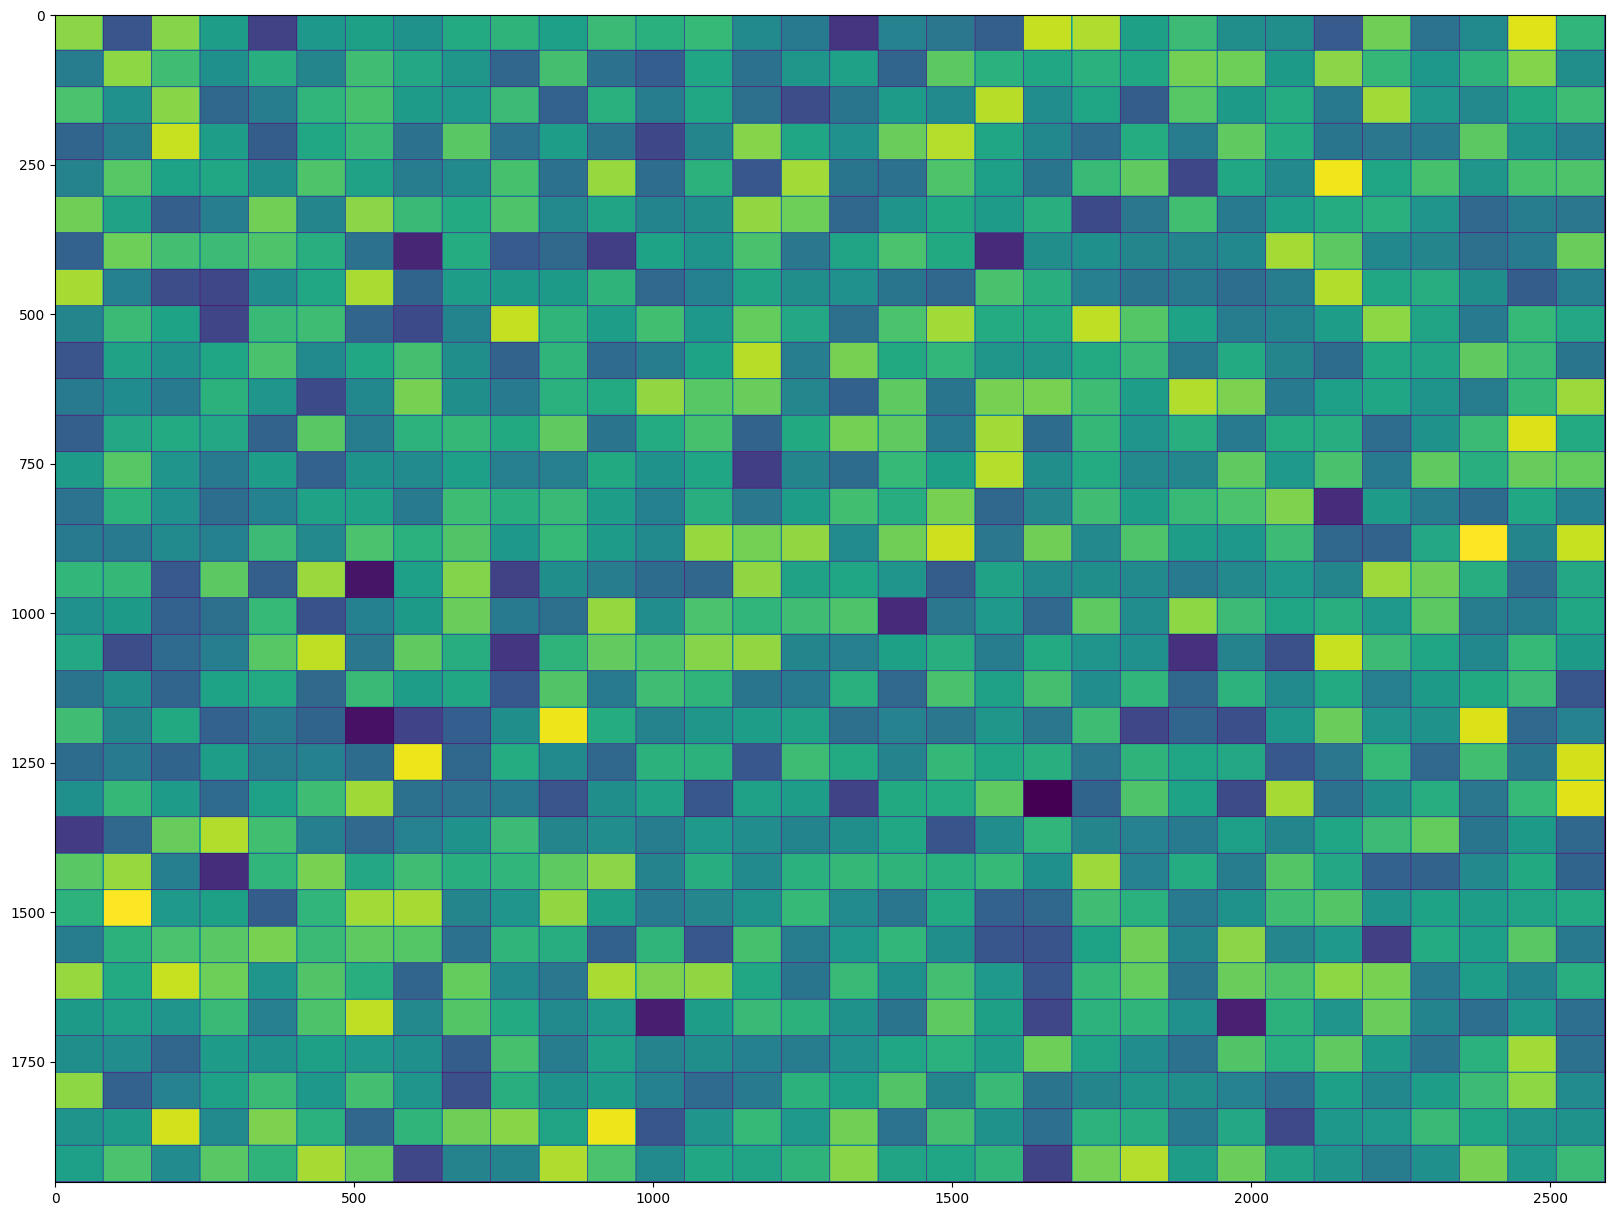

In [73]:
cls_tok = cls_token[:, :, None, None].repeat(1, 1, in_hw[0] // 14, in_hw[1] // 14)

print(cls_tok[0, 0])
z = make_square_grid(cls_tok[0].cpu().numpy())
plt.imshow(z)

(-0.5, 809.5, 609.5, -0.5)

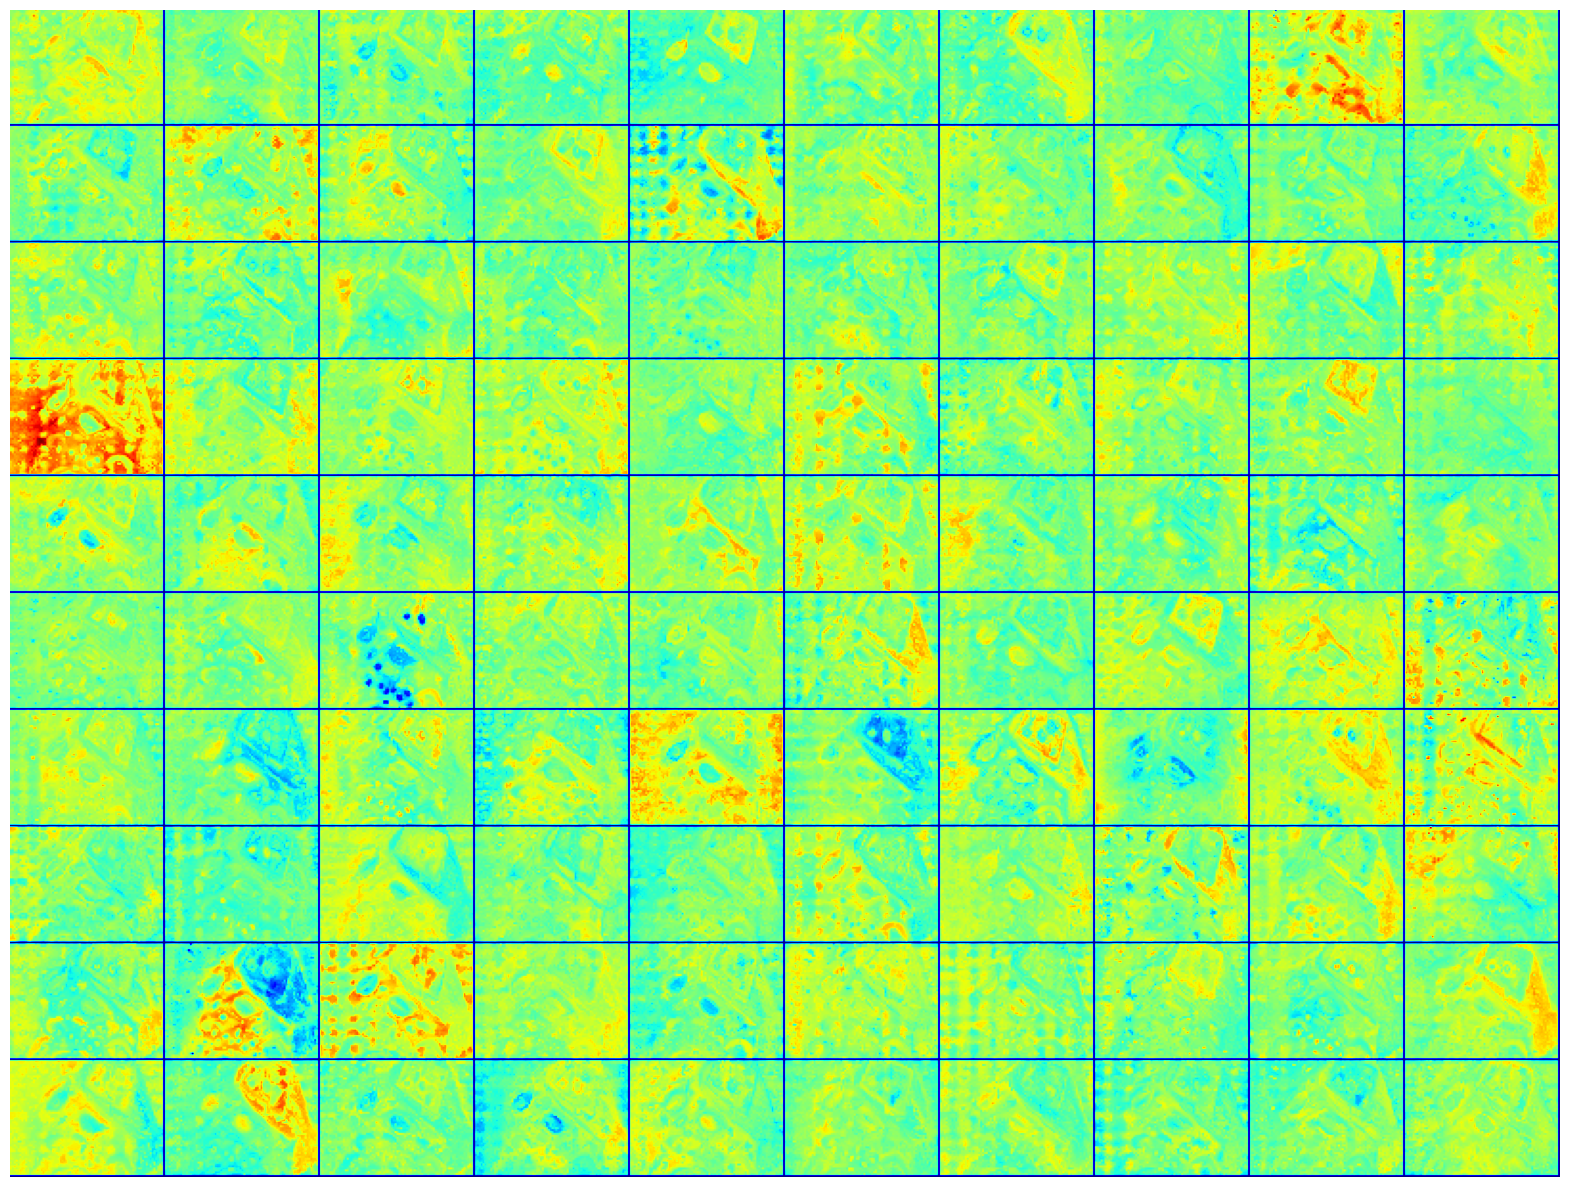

In [61]:
z = patch_token[0].cpu().numpy()

from igniter.visualizer import make_square_grid

z = make_square_grid(z[:100])

plt.rcParams['figure.figsize'] = [20, 16]
plt.imshow(z, cmap='jet')
plt.axis('off')

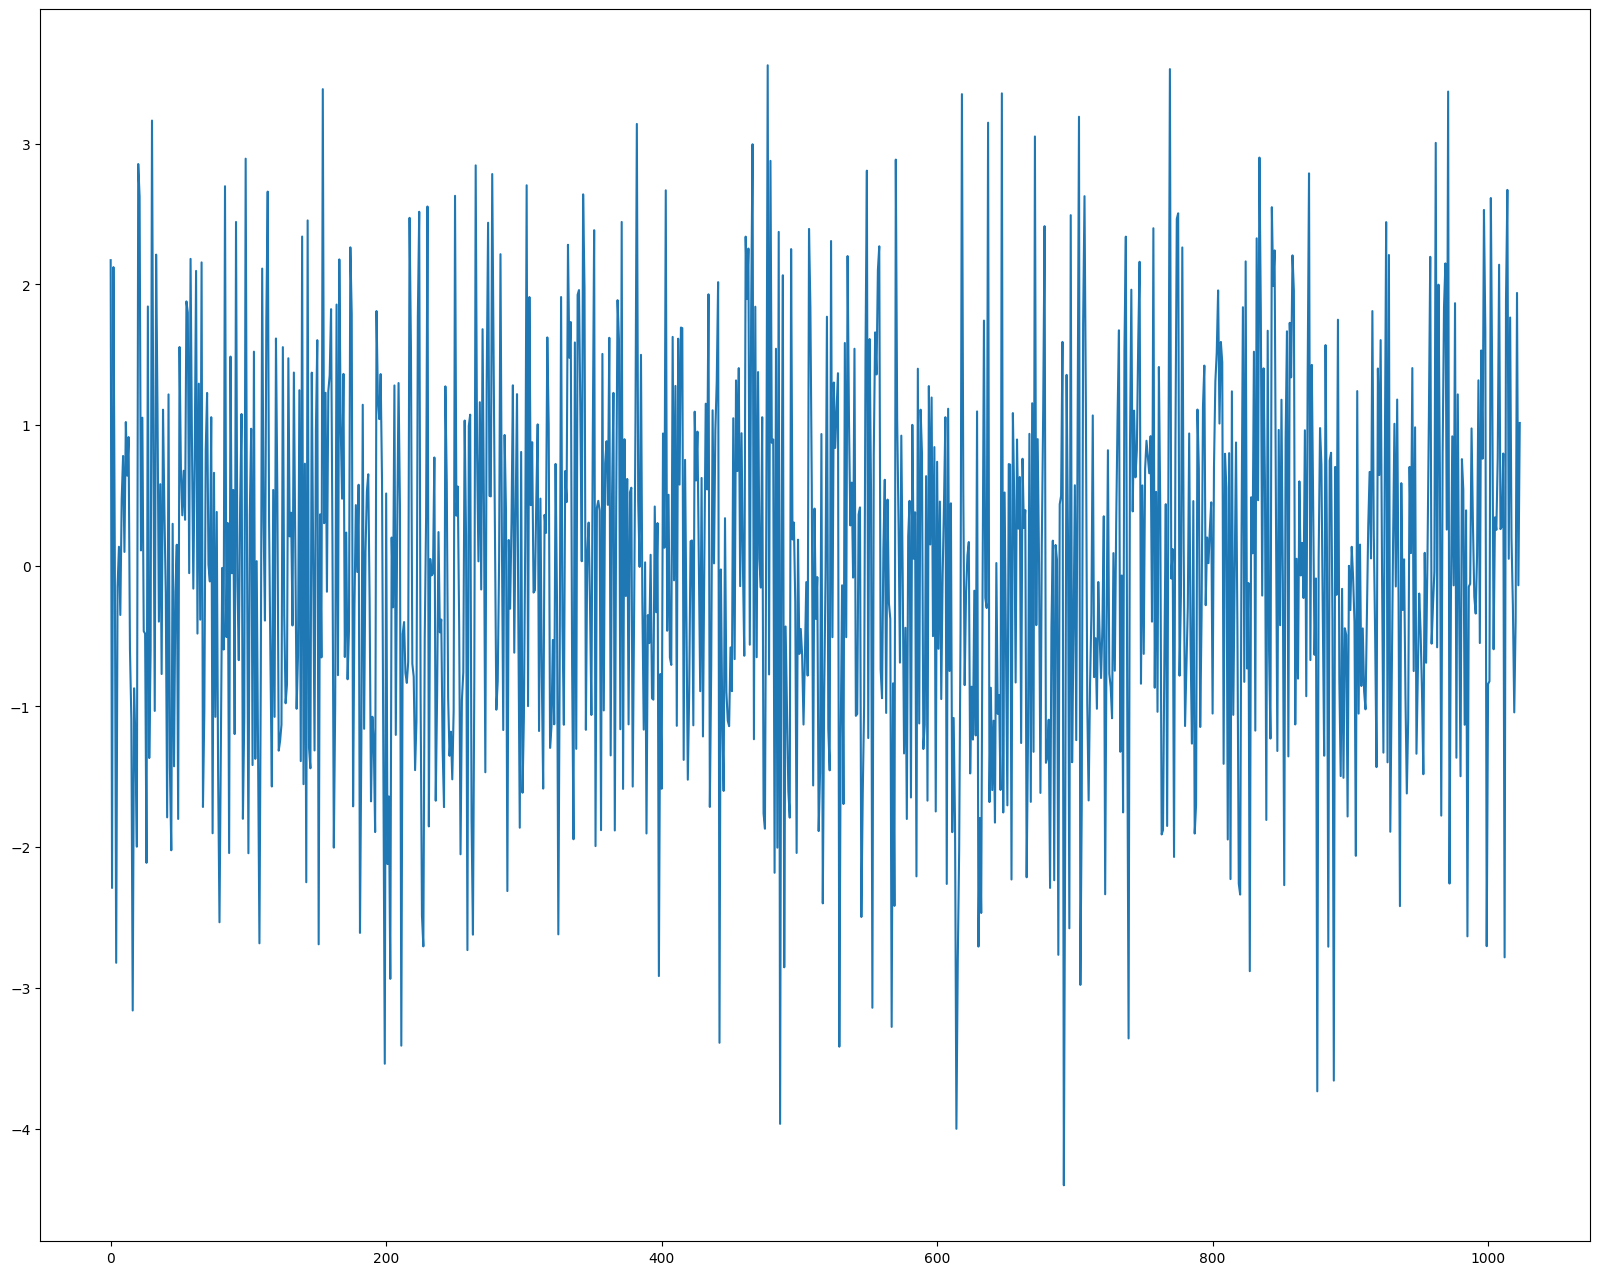

In [52]:
plt.plot(cls_token[0].cpu().numpy())